### SMOTE (Synthetic Minority Over-sampling Technique)
Smote là kỹ thuật tăng cường lớp thiểu số bằng cách tạo ra các điểm dữ liệu tổng hợp (synthetic data) thay vì lặp lại các điểm c ũ

Mục tiêu:
+ Tăng số lượng mẫu ở lớp thiểu số để làm cho dữ liệu trở nên cân bằng hơn
+ Tránh overfitting như khi bạn chỉ sao chép(duplicate) lại dữ liệu thiểu số

Cơ chế hoạt động:
+ Chọn một mẫu ngẫu nhiên x từ lớp thiểu số
+ Tìm k-nearest neighbors(thường là 5) trong lớp thiểu số
+ Chọn ngẫu nhiên một trong các hàng xóm gần nhất: x'
+ Sinh điểm mới theo công thức nội suy


In [4]:
from sklearn.datasets import make_classification

## thư viện dùng để tạo ra một tập dữ liệu phân loại giả lập

X, y = make_classification(
    n_samples=1000,
    n_redundant=0,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=12,
)
# X là ma trận đặc trưng(feature), y là nhãn của các mẫu

In [5]:
import pandas as pd
df1 = pd.DataFrame(X, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
final_df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

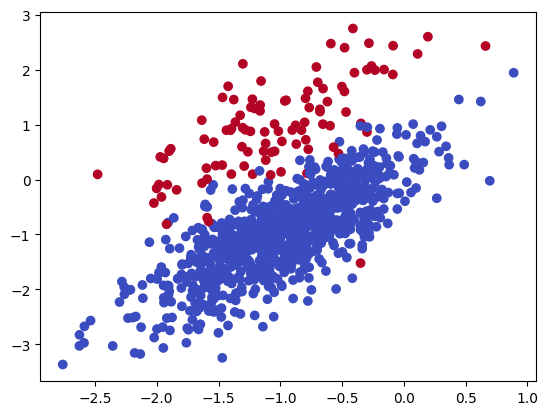

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df.f1, final_df.f2, c=final_df.target, cmap="coolwarm") # màu mỗi điểm dựa theo nhãn c=final_df.target

In [10]:
from imblearn.over_sampling import SMOTE

In [ ]:
## transform the dataset 
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[["f1", "f2"]], final_df["target"])
# hàm fit_resample sẽ tìm lớp thiểu số trong target và tạo thêm các dữ liệu
# cho lớp bằng cách nội suy giữa các điểm dữ liệu hiện có

In [12]:
X.shape

(1800, 2)

In [14]:
df1 = pd.DataFrame(X, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
oversample_df = pd.concat([df1, df2], axis=1)

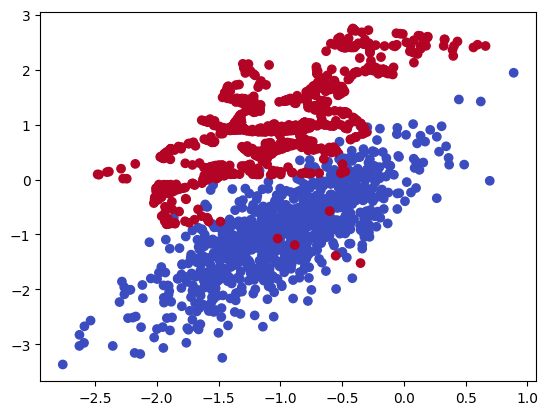

In [15]:
plt.scatter(oversample_df.f1, oversample_df.f2, c=oversample_df.target, cmap="coolwarm")